In [1]:
%load_ext autoreload
%autoreload 2

import tlviz
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac, parafac2


In [2]:
aminoacids = tlviz.data.load_aminoacids()


Loading Aminoacids dataset from:
Bro, R, PARAFAC: Tutorial and applications, Chemometrics and Intelligent Laboratory Systems, 1997, 38, 149-171


In [3]:
aminoacids


<xarray.DataArray (Sample: 5, Excitation frequency: 61, Emission frequency: 201)> Size: 490kB
[61305 values with dtype=float64]
Coordinates:
  * Emission frequency    (Emission frequency) float64 2kB 250.0 251.0 ... 450.0
  * Excitation frequency  (Excitation frequency) float64 488B 240.0 ... 300.0
  * Sample                (Sample) int32 20B 0 1 2 3 4

In [ ]:
X = tl.tensor(aminoacids.data)
cp_tensor_1 = parafac(X, 3, init="random", random_state=0)
cp_tensor_2 = parafac2(X, 3, init="random", random_state=0)


In [ ]:
cp_tensor_1


(weights, factors) : rank-3 CPTensor of shape (5, 61, 201)

In [ ]:
cp_tensor_2


(weights, factors, projections) : rank-3 Parafac2Tensor of shape ((61, 201), (61, 201), (61, 201), (61, 201), (61, 201)) 

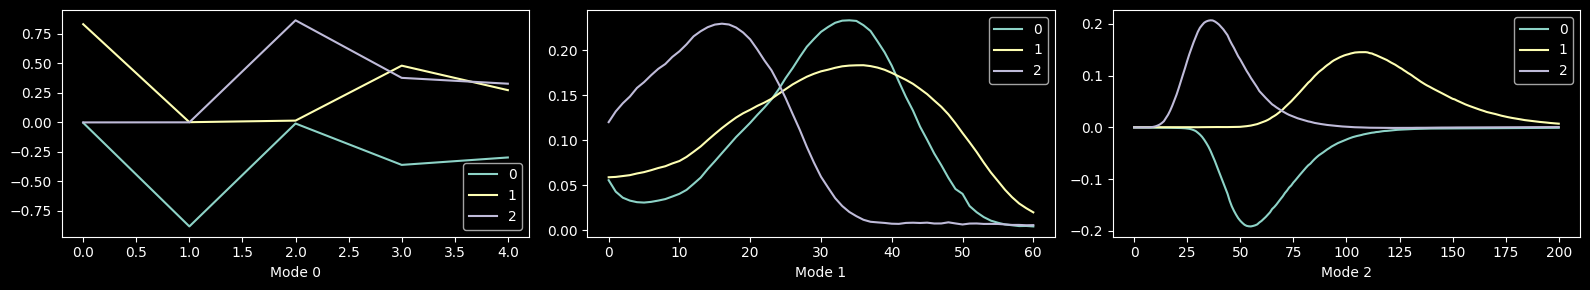

In [ ]:
fig, ax = tlviz.visualisation.components_plot(cp_tensor_1)
plt.show()


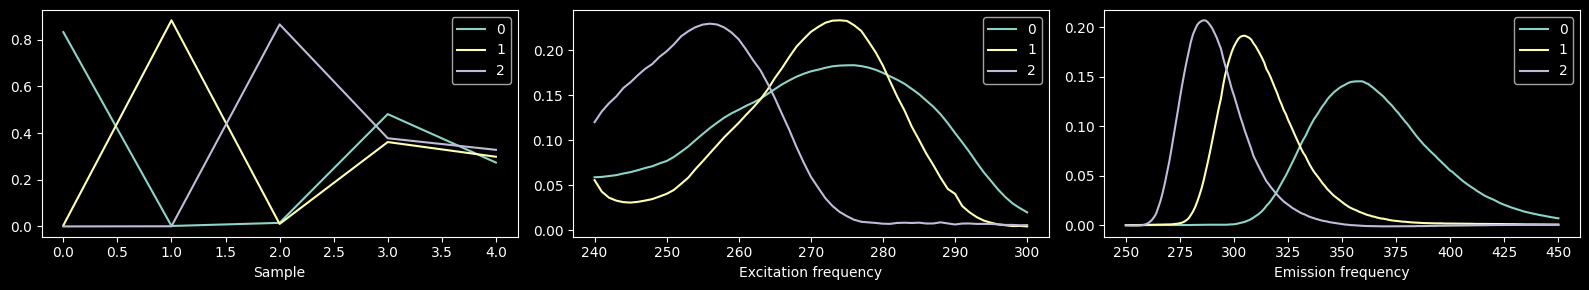

In [8]:
cp_tensor_postprocessed = tlviz.postprocessing.postprocess(cp_tensor_1, aminoacids)
fig, ax = tlviz.visualisation.components_plot(cp_tensor_postprocessed)
plt.show()
